In [167]:
import pandas as pd
import numpy as np
from pathlib import Path
import warnings # supress warnings



warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [168]:
%env KAGGLE_USERNAME=gcpeppe
%env KAGGLE_KEY=d18c442514f69777a7bacb75dac95072

!kaggle datasets download -d ronitf/heart-disease-uci --unzip -p '/content/book-recommendation-dataset'
!ls /content/book-recommendation-dataset

env: KAGGLE_USERNAME=gcpeppe
env: KAGGLE_KEY=d18c442514f69777a7bacb75dac95072
  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 2.88MB/s]
heart.csv


In [169]:
DATA_PATH = Path("/content/book-recommendation-dataset")

df = pd.read_csv(DATA_PATH/'heart.csv')

In [170]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Checando variáveis categóricas

In [171]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [172]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [173]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Redução de dimensionalidade com análise de componente principal

In [212]:
from sklearn.model_selection import train_test_split
from seaborn import scatterplot, pairplot
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import plotly.express as px


In [175]:
X = PCA(n_components=2).fit_transform(X)

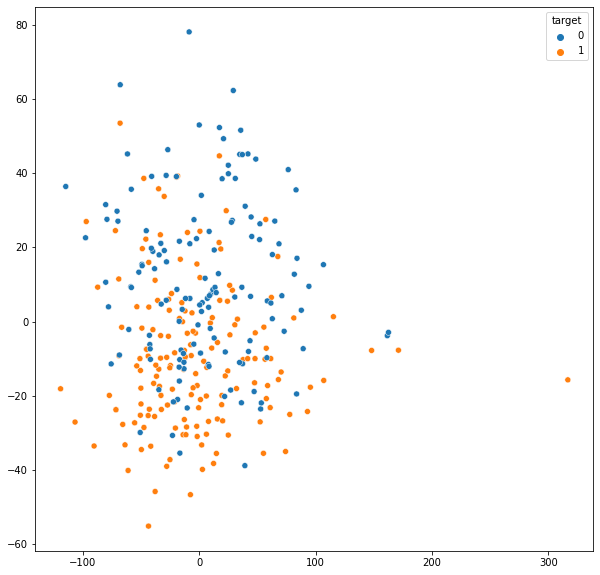

In [176]:
plt.figure(figsize=(10,10))

scatterplot(X[:, 0], X[:, 1], hue=y['target'])

In [183]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [220]:
X = df.drop('target', axis=1)
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [179]:
from sklearn.metrics import f1_score

In [215]:
params_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 5],
    'min_samples_split': [2, 3, 4],
    'max_features': ['auto', 5, 8],
    'bootstrap': [False, True]
    }

In [216]:
clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid=params_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [217]:
clf_best = grid_search.best_estimator_

In [218]:
y_pred = clf_best.predict(X_test)

In [219]:
f1_score(y_test, y_pred)

0.7999999999999999

In [194]:
params_grid = {
    'activation': ['logistic', 'relu', 'tahn'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [175, 200, 225],
    'n_iter_no_change': [7, 10, 13],
    'power_t': [0.25, 0.5, 0.75]
    }

In [195]:
clf = MLPClassifier()

grid_search = GridSearchCV(clf, param_grid=params_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2184 out of 2187 | elapsed:  3.0min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2187 out of 2187 | elapsed:  3.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tahn'],
                         'learning_rat

In [196]:
clf_best = grid_search.best_estimator_

In [197]:
y_pred = clf_best.predict(X_test)

In [198]:
f1_score(y_test, y_pred)

0.8923076923076922

In [209]:
params_grid = {
    'max_leaf_nodes': [None, 4, 8],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 5],
    'min_samples_split': [2, 3, 4],
    'max_features': ['auto', 5, 10],
    
    }

In [210]:
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid=params_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:    5.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [211]:
clf_best = grid_search.best_estimator_
y_pred = clf_best.predict(X_test)
f1_score(y_test, y_pred)

0.7333333333333334